In [2]:
from ultralytics import YOLO
import cv2
import numpy as np

In [3]:
import torch
print(torch.cuda.is_available())

True


In [4]:
model = 'runs/detect/train/weights/best.pt'


In [22]:
image = 'Tank_destroyers -test image.webp'

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2


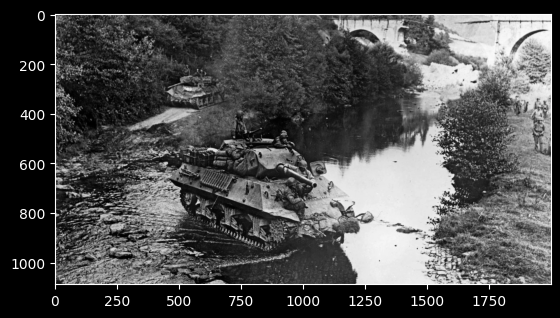

In [23]:
img = Image.open(image)
plt.imshow(img)
plt.show()

In [24]:
yolo = YOLO(model)
results = yolo(image)



image 1/1 c:\Users\miana\Desktop\Target\Tank_destroyers -test image.webp: 352x640 1 APC-IFV, 1 TANK, 49.9ms
Speed: 3.0ms preprocess, 49.9ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)


In [25]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'APC-IFV', 1: 'ART', 2: 'CAR', 3: 'MLRS', 4: 'TANK', 5: 'TRUCK'}
 obb: None
 orig_img: array([[[167, 166, 167],
         [149, 149, 149],
         [118, 118, 118],
         ...,
         [239, 239, 239],
         [239, 239, 239],
         [240, 240, 240]],
 
        [[167, 166, 167],
         [155, 155, 155],
         [132, 132, 132],
         ...,
         [238, 238, 238],
         [239, 239, 239],
         [240, 240, 240]],
 
        [[158, 158, 158],
         [155, 155, 155],
         [143, 143, 143],
         ...,
         [239, 239, 239],
         [240, 240, 240],
         [240, 240, 240]],
 
        ...,
 
        [[ 56,  56,  56],
         [ 48,  48,  48],
         [ 43,  43,  43],
         ...,
         [112, 112, 112],
         [106, 106, 106],
         [ 97,  97,  97]],
 
        [[ 88,  88,  88],
         [ 73,  73,  73],
   

In [26]:
id_name_dict = results[0].names
print(id_name_dict)

{0: 'APC-IFV', 1: 'ART', 2: 'CAR', 3: 'MLRS', 4: 'TANK', 5: 'TRUCK'}


In [29]:
ids = {}
cls_ids = results[0].boxes.cls


    

In [30]:
ids = cls_ids.tolist()

ids

[0.0, 4.0]

In [31]:
bboxs=results[0].boxes.xyxy.cpu().numpy()



In [32]:
boxe= bboxs.astype(int)

In [47]:
#draw bounding box
img = cv2.imread(image)

In [44]:
id_name_dict = results[0].names
ids = {}
cls_ids = results[0].boxes.cls
ids = cls_ids.tolist()

#combine ids and id_names for predicted label
Name__ = list(map(lambda x: id_name_dict[x], ids))



In [48]:
def draw_bboxes(image, detection):
    for i in range(len(detection)):
        cv2.rectangle(image, (detection[i][0], detection[i][1]), (detection[i][2], detection[i][3]), (0, 255, 0), 2)
        #add labels
        cv2.putText(image, Name__[i], (detection[i][0], detection[i][1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    return image

In [49]:
img = draw_bboxes(img, boxe)


In [50]:
img

array([[[167, 166, 167],
        [149, 149, 149],
        [118, 118, 118],
        ...,
        [239, 239, 239],
        [239, 239, 239],
        [240, 240, 240]],

       [[167, 166, 167],
        [155, 155, 155],
        [132, 132, 132],
        ...,
        [238, 238, 238],
        [239, 239, 239],
        [240, 240, 240]],

       [[158, 158, 158],
        [155, 155, 155],
        [143, 143, 143],
        ...,
        [239, 239, 239],
        [240, 240, 240],
        [240, 240, 240]],

       ...,

       [[ 56,  56,  56],
        [ 48,  48,  48],
        [ 43,  43,  43],
        ...,
        [112, 112, 112],
        [106, 106, 106],
        [ 97,  97,  97]],

       [[ 88,  88,  88],
        [ 73,  73,  73],
        [ 51,  51,  51],
        ...,
        [106, 106, 106],
        [ 97,  97,  97],
        [ 84,  84,  84]],

       [[118, 118, 118],
        [ 88,  88,  88],
        [ 52,  52,  52],
        ...,
        [100, 100, 100],
        [ 90,  90,  90],
        [ 76,  76,  76]]

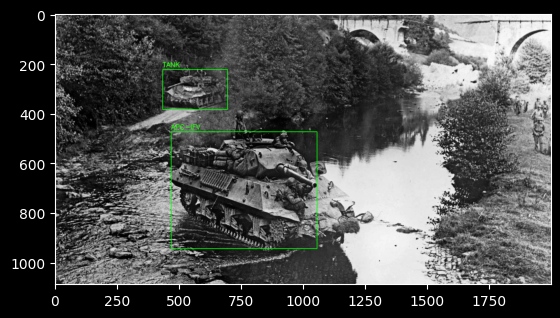

In [51]:
img = Image.fromarray(img)
plt.imshow(img)
plt.show()